# Soil Moisture

This notebook loads soil moisture data saved in a CSV file, and analyzes it. It plots the soil moisture, and find the best fit line.

To use this notebook:

* Copy the `moisture.csv` file into the same folder as this notebook
* Run all the cells using the **▶︎ Run** button above. This will run the selected cell, then move to the next one.

The CSV file now needs to be loaded, using pandas

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the temperature CSV file
df = pd.read_csv(r"D:\CSES\Year2\IoT\nightlight\moisture.csv", names=['soil moisture'])

In [68]:
soil_moisture = np.array(df['soil moisture']).reshape(-1, 1)
soil_moisture

array([[902],
       [796],
       [683],
       [593],
       [184],
       [165]])

In [63]:
# Calculate the soil moisture %
def cal_soil_moisture(wet_soil, dry_soil):
    return (wet_soil - dry_soil) / dry_soil * 100

In [69]:
dry_soil = [185.5, 95.2, 102.9, 103.0, 101.8, 104.1]
wet_soil = [193.6, 100.2, 109.9, 110.8, 110.0, 115.2]

moisture_content = [cal_soil_moisture(x, y) for x, y in zip(wet_soil, dry_soil)]
moisture_content # Corresponding soil moisture %

[4.366576819407006,
 5.2521008403361344,
 6.802721088435374,
 7.57281553398058,
 8.055009823182715,
 10.662824207492804]

In [70]:
# Fit a linear regression model
model = LinearRegression()
model.fit(soil_moisture, moisture_content)

# Generate predictions
y_pred = model.predict(soil_moisture)

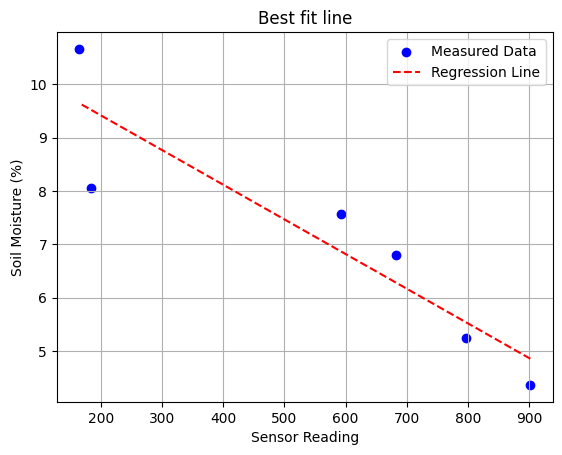

In [72]:
plt.scatter(soil_moisture, moisture_content, color='blue', label='Measured Data')
plt.plot(soil_moisture, y_pred, color='red', linestyle='--', label='Regression Line')
plt.xlabel('Sensor Reading')
plt.ylabel('Soil Moisture (%)')
plt.title('Best fit line')
plt.legend()
plt.grid()
plt.show()